In [10]:
import torch

grids, commands = torch.load('data/robot_field_data.pt')

In [11]:
import jax
import jax.numpy as jnp

dt = 0.025  # 40 Hz

@jax.jit
def system(state, action):
  """Classic (omnidirectional) wheeled robot system.
  Args:
    x: state, (3, ) array
    u: control, (3, ) array
    t: scalar time
  Returns:
    xdot: state time derivative, (3, )
  """
  x = state
  u = action
  
  c = jnp.cos(x[2])
  s = jnp.sin(x[2])
  
  g = jnp.array([[c, -s, 0],
                 [s, c, 0],
                 [0, 0, 1]])
  
  xdot = g @ u

  return xdot

def dynamics(x, u):
  return x + dt * system(x, u)

In [12]:
import numpy as np
x0 = jnp.array([0.0, 0.0, 0.0])

commands = commands[12116:13831]

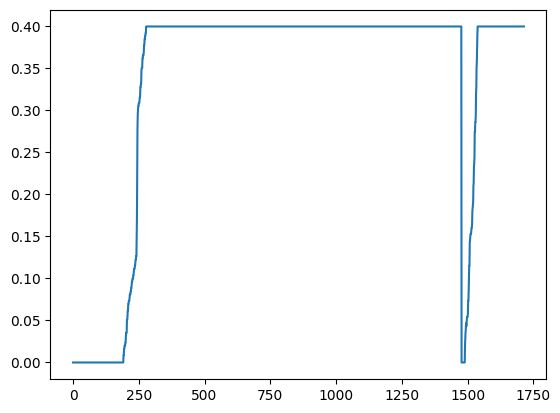

In [32]:
import matplotlib.pyplot as plt

plt.plot(commands[:,0])

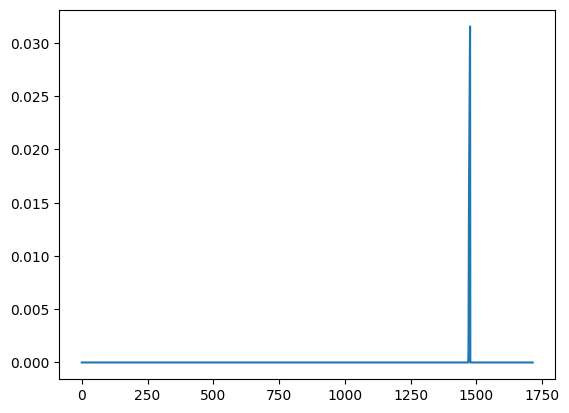

In [31]:
plt.plot(commands[:,1])

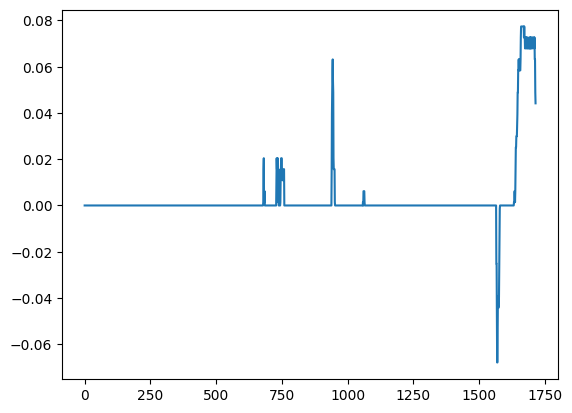

In [33]:
plt.plot(commands[:,5])

In [22]:
x = np.ndarray(shape=(len(commands)+1,3))
print(x.shape)

x[0] = x0

for i in range(len(commands)):
  u = jnp.array([commands[i,0], commands[i,1], commands[i,5]])
  # print(u)
  
  x[i+1] = dynamics(x[i], u)

(1716, 3)
[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 ...
 [14.3273344   0.19486611  0.13011259]
 [14.33724976  0.19616356  0.13133557]
 [14.3471632   0.19747315  0.13243988]]


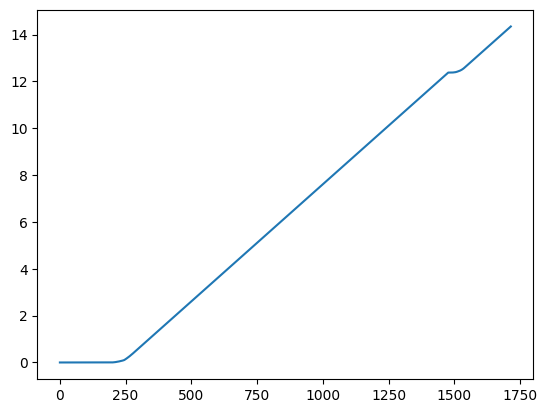

In [28]:
plt.plot(x[:,0])

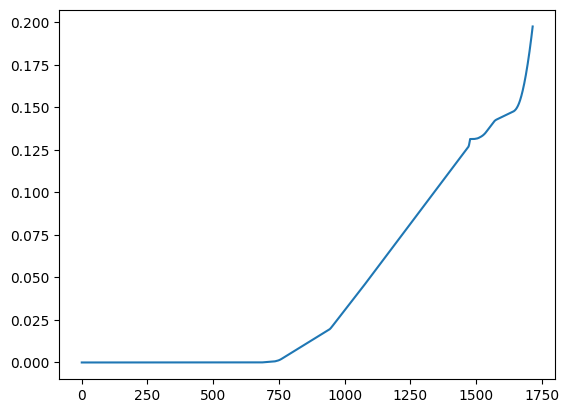

In [26]:
plt.plot()